In [2]:
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np

import torch.nn as nn
import torch
import torch.functional as f

In [919]:
import cv2

In [3]:
from ale_py import ALEInterface
ale = ALEInterface()

A.L.E: Arcade Learning Environment (version 0.8.1+53f58b7)
[Powered by Stella]


In [4]:
from ale_py.roms import Skiing
ale.loadROM(Skiing)

Game console created:
  ROM file:  /home/makinoharafan1/code/rl-atari-skiing/rl-skiing/lib/python3.11/site-packages/AutoROM/roms/skiing.bin
  Cart Name: Skiing (1980) (Activision) [!]
  Cart MD5:  b76fbadc8ffb1f83e2ca08b6fb4d6c9f
  Display Format:  AUTO-DETECT ==> NTSC
  ROM Size:        2048
  Bankswitch Type: AUTO-DETECT ==> 2K

Running ROM file...
Random seed is 1714313286


In [5]:
from typing import Any, Text

from ale_py.env import gym as ale_gym

# Patch to allow rendering Atari games.
# The AtariEnv's render method expects the mode to be in self._render_mode
# (usually initialized with env.make) instead of taking mode as a param.
_original_atari_render = ale_gym.AtariEnv.render


def atari_render(self, mode: Text = 'rgb_array') -> Any:
  original_render_mode = self._render_mode
  try:
    self._render_mode = mode
    return _original_atari_render(self)
  finally:
    self._render_mode = original_render_mode


ale_gym.AtariEnv.render = atari_render

In [6]:
env = gym.make('ALE/Skiing-v5')

A.L.E: Arcade Learning Environment (version 0.8.1+53f58b7)
[Powered by Stella]


In [902]:
def epsilon_greedy_policy(state, Q, epsilon, n_action):
  probs = torch.ones(n_action) * epsilon / n_action
  best_action = torch.argmax(Q[state]).item()
  probs[best_action] += 1.0 - epsilon
  return torch.multinomial(probs, 1).item()

# def epsilon_greedy_policy(observation, Q, epsilon, n_action):
#   A = np.ones(n_action, dtype=int) * epsilon / n_action
#   best_action = np.argmax(Q[observation])
#   A[best_action] += (1.0 - epsilon)
#   return A

In [914]:
from collections import defaultdict

def sarsa(env, gamma, n_episode, alpha, epsilon):
  n_action = env.action_space.n
  Q = defaultdict(lambda : torch.empty(n_action))

  for episode in range(n_episode):
    env.reset()
    state = (True, False)
    # state = 0
    is_done = False
    action = epsilon_greedy_policy(state, Q, epsilon, n_action)

    while not is_done:
      new_state, reward, is_done, _, _ = env.step(action)

      player_pos = get_pos_player(new_state)
      flags_pos = get_pos_flags(new_state)

      # new_state = player_pos + flags_pos

      new_state = (player_pos[1] > flags_pos[1] - 10, player_pos[1] < flags_pos[1] + 10)

      new_action = epsilon_greedy_policy(new_state, Q, epsilon, n_action)
      td_delta = reward + gamma * torch.max(Q[new_state]) - Q[state][action]
      Q[state][action] += alpha * td_delta
      length_episode[episode] += 1
      total_reward_episode[episode] += reward

      state = new_state
      action = new_action
    
    print("Episode:", episode, "Total Reward:", total_reward_episode[episode])
    # print(Q)

  policy = {}
  for state, actions in Q.items():
    policy[state] = torch.argmax(actions).item()

  return Q, policy

In [917]:
n_episode = 50

length_episode = [0] * n_episode
total_reward_episode = [0] * n_episode

In [907]:
gamma = 0.1
alpha = 0.2
epsilon = 0.1

In [918]:
optimal_Q, optimal_policy = sarsa(env, gamma, n_episode, alpha, epsilon)

Episode: 0 Total Reward: -26549.0
Episode: 1 Total Reward: -19560.0
Episode: 2 Total Reward: -33756.0
Episode: 3 Total Reward: -32001.0
Episode: 4 Total Reward: -30000.0
Episode: 5 Total Reward: -26325.0
Episode: 6 Total Reward: -30000.0
Episode: 7 Total Reward: -31775.0
Episode: 8 Total Reward: -30000.0
Episode: 9 Total Reward: -30000.0
Episode: 10 Total Reward: -33073.0
Episode: 11 Total Reward: -31632.0
Episode: 12 Total Reward: -30000.0
Episode: 13 Total Reward: -33840.0
Episode: 14 Total Reward: -29538.0
Episode: 15 Total Reward: -28151.0
Episode: 16 Total Reward: -30000.0
Episode: 17 Total Reward: -29166.0
Episode: 18 Total Reward: -30000.0
Episode: 19 Total Reward: -33633.0
Episode: 20 Total Reward: -34045.0
Episode: 21 Total Reward: -28513.0
Episode: 22 Total Reward: -27380.0
Episode: 23 Total Reward: -30000.0
Episode: 24 Total Reward: -30000.0
Episode: 25 Total Reward: -34631.0
Episode: 26 Total Reward: -29530.0
Episode: 27 Total Reward: -25358.0
Episode: 28 Total Reward: -300

KeyboardInterrupt: 

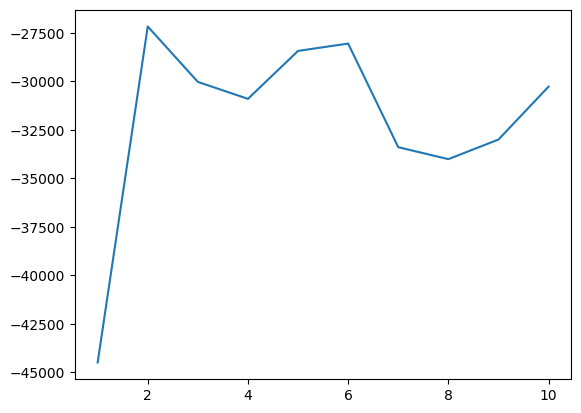

In [909]:
plt.plot(np.arange(1, n_episode + 1), total_reward_episode)
plt.show()

In [839]:
env.reset()

(array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 {'lives': 0, 'episode_frame_number': 0, 'frame_number': 868})

In [812]:
new_state, reward, is_done, _, _ = env.step(env.action_space.sample())

In [99]:
new_state = new_state[len(new_state) // 2 : len(new_state) // 2 + 20]

In [100]:
new_state.shape

(20, 160, 3)

In [81]:
new_state2, reward, is_done, _, _ = env.step(env.action_space.sample())

In [53]:
new_state[1][1][0] = 4

In [91]:
import hashlib

def custom_hash(arr):
    m = hashlib.sha256()
    m.update(str(arr).encode('utf-8'))
    return int(m.hexdigest(), 36)

In [849]:
new_state, reward, is_done, _, _ = env.step(env.action_space.sample())

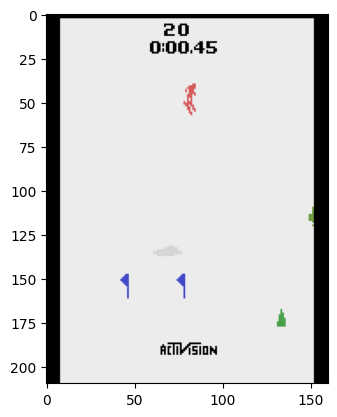

In [852]:
plt.imshow(new_state)

In [829]:
new_state.shape

(210, 160, 3)

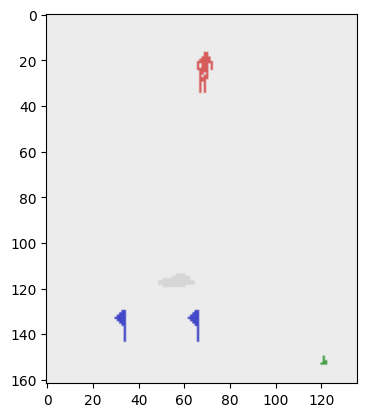

In [814]:
new_state = new_state[24: -24:, 12: -12]

new_state.shape

plt.imshow(new_state)

In [842]:
def get_pos_player(observe):
    ids = np.where(np.sum(observe == [214, 92, 92], -1) == 3)
    return int(ids[0].mean()), int(ids[1].mean())

print(get_pos_player(new_state))

(48, 80)


In [851]:
def get_pos_flags(observe):
    if np.any(np.sum(observe == [184, 50, 50], -1) == 3):
        ids = np.where(np.sum(observe == [184, 50, 50], -1) == 3)
        return int(ids[0].mean()), int(ids[1].mean())
    else:
        base = 0
        ids = np.where(np.sum(observe[base:-60] == [66, 72, 200], -1) == 3)
        if len(ids[0]) == 0:
            return 0, 0  
        else:
            return int(ids[0].mean() + base), int(ids[1].mean())

print(get_pos_flags(new_state))

(148, 61)


In [786]:
def isolate_red_blue(image, dilation_factor=1, block_size=5):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    lower_red = np.array([0, 100, 100])
    upper_red = np.array([10, 255, 255])
    lower_blue = np.array([100, 100, 100])
    upper_blue = np.array([140, 255, 255])

    red_mask = cv2.inRange(hsv_image, lower_red, upper_red)
    blue_mask = cv2.inRange(hsv_image, lower_blue, upper_blue)

    mask = red_mask + blue_mask

    result_image = image.copy()
    result_image[np.where(red_mask != 0)] = [0, 0, 255] 
    result_image[np.where(blue_mask != 0)] = [255, 0, 0]
    result_image[np.where(mask == 0)] = [255, 255, 255]

    return result_image

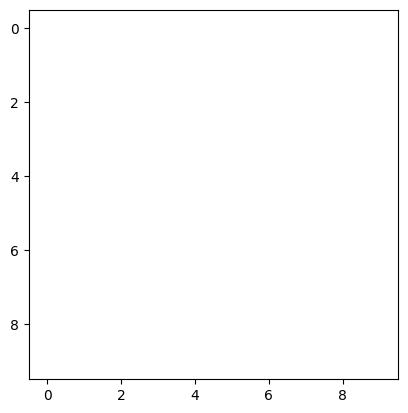

In [787]:
plt.imshow(isolate_red_blue(resized_image))

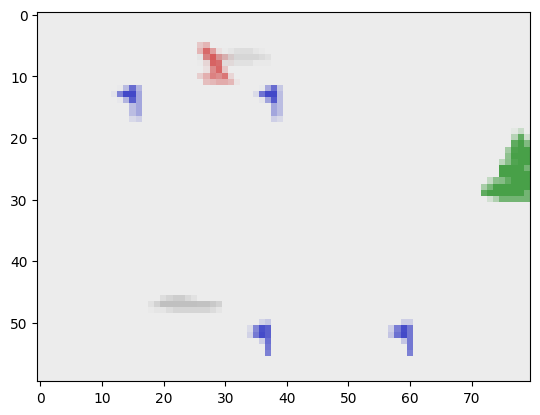

In [796]:
resized_image = cv2.resize(new_state, (, 10), interpolation = cv2.INTER_AREA)

plt.imshow(resized_image)